## Ejercicio Final Módulo 3

1. <a href="#Extracción">Extracción</a>
2. <a href="#Limpieza">Limpieza</a>
3. <a href="#Visualización">Visualización</a>
4. <a href="#Evaluación">Evaluación</a>

<h2 id="Extracción">Extracción</h2>

Cargamos las librerias necesaria para el tratamientos de datos e importamos los archivos csv:

In [426]:
# Gestión de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# Análisis estádistica inferencial y descriptiva
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.options.display.float_format = '{:.2f}'.format # para poner los números con un decimal
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore") #determinación de si se debe emitir un mensaje de advertencia



In [427]:
#importamos csv:
    #* df_cf= customer_flight
df_cf=pd.read_csv('customer_flight_activity.csv')

    #* df_l= customer_loyalty
df_l=pd.read_csv('customer_loyalty_history.csv')

In [428]:
#Verificamos qué hemos extraido con un .head()
df_cf.head(6)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.00,0,0
1,100102,2017,1,10,4,14,2030,203.00,0,0
2,100140,2017,1,6,0,6,1200,120.00,0,0
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0
5,100301,2017,1,0,0,0,0,0.00,0,0


In [429]:
#sacamos información del cuerpo del df (filas, columnas):
df_cf.shape

(405624, 10)

In [430]:
df_l.head(6)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.00,1.00
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.00,Married,Star,3842.79,Standard,2014,10,NaN,NaN
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.00,Married,Star,3844.57,Standard,2012,5,NaN,NaN


In [431]:
df_l.shape

(16737, 16)

<h2 id="Limpieza">Limpieza</h2>


### Fase 1: Exploración y Limpieza

 1. Exploración Inicial:  
    * Realiza una exploración inicial de los datos para identificar posibles problemas, 
    como valores nulos, atípicos o datos faltantes en las columnas relevantes.

### Realizamos una primera exploracion del csv *'customers_flight'*

In [432]:
#sacamos informacion de los csv:
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


Podemos observar, que las columnas de este data_frame no tiene valores nulos, ya que el numero de ' No-Null count' es igual al número de filas.
Y que todas las columnas son de tipo numérico.

In [433]:
df_cf.shape
print(f'Número de columnas:', df_cf.shape[1])
print(f'Número de filas:', df_cf.shape[0])

Número de columnas: 10
Número de filas: 405624


In [434]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [435]:
df_l.shape

(16737, 16)

Observamos que hay valores nulos y que algunas columnas no presentan un tipo de valor adecuado.

 * Utiliza funciones de Pandas para obtener información sobre la estructura de los 
    datos, la presencia de valores nulos y estadísticas básicas de las columnas 
    involucradas.

In [436]:
#Creamos una funcion para sacar el porcentaje de nulos de ambos df:

def nulos_columna(df, nombre):
    
    '''calcula el % de nulos en un df y te lo devuelve en una tabla:
    args- df- tabla con los datos a revisar
    return- df- %nulos por columna'''

    nulos= (df.isnull().sum()/df.shape[0])*100 #dividimos el numero de nulos de cada columna entre el numero de filas(shape[0])
    df_nulos=pd.DataFrame(nulos, columns=['%nulos'])# pasamos los resultados a un df.
    print(f"Los nulos encontrados para los datos {nombre}:")
    if df_nulos[df_nulos['%nulos']>0].shape[0] == 0:
        return 'No hay columnas con valores nulos'
    else:
        return df_nulos[df_nulos['%nulos']>0]



In [437]:
#Comprobamos que el data_frame de costumers_flight no presenta nulos:
df_cf_nulos=nulos_columna(df_cf, 'customers_flights')

df_cf_nulos# La tabla estará vacía.

Los nulos encontrados para los datos customers_flights:


'No hay columnas con valores nulos'

Revisamos los valores únicos:

In [438]:
print('Los valores únicos de cada columna son los siguientes:\n\n')
for column in df_cf.columns:
    print(f'Para la columna: {column}\n')
    df_cf_unicos=pd.DataFrame(df_cf[column].value_counts())
    print(f'Número de valores únicos:{len(df_cf[column].value_counts())}')
    display(df_cf_unicos) #nos mostrará los datos más ordenados. En una tabla

Los valores únicos de cada columna son los siguientes:


Para la columna: Loyalty Number

Número de valores únicos:16737


,count
Loyalty Number,
678205,72
989528,48
373638,48
684889,48
684881,48
...,...
428526,24
428536,24
428565,24


Para la columna: Year

Número de valores únicos:2


,count
Year,
2017,202812
2018,202812


Para la columna: Month

Número de valores únicos:12


,count
Month,
1,33802
9,33802
2,33802
3,33802
11,33802
4,33802
5,33802
7,33802
6,33802


Para la columna: Flights Booked

Número de valores únicos:22


,count
Flights Booked,
0,197992
3,18228
11,15705
5,15084
7,14561
8,14357
9,14164
6,13847
2,13641


Para la columna: Flights with Companions

Número de valores únicos:12


,count
Flights with Companions,
0,296887
2,19272
3,19015
1,17905
4,13665
5,13424
6,9911
7,7089
8,3965


Para la columna: Total Flights

Número de valores únicos:33


,count
Total Flights,
0,197992
6,15273
10,14393
8,14056
4,13656
2,13032
12,12409
11,12300
9,10688


Para la columna: Distance

Número de valores únicos:4746


,count
Distance,
0,197992
2520,410
2880,401
1680,389
2160,365
...,...
1333,1
3722,1
3985,1


Para la columna: Points Accumulated

Número de valores únicos:1549


,count
Points Accumulated,
0.00,197992
180.00,763
270.00,734
288.00,717
189.00,709
...,...
658.50,1
556.25,1
10.80,1


Para la columna: Points Redeemed

Número de valores únicos:587


,count
Points Redeemed,
0,381443
447,103
523,100
443,98
516,97
...,...
834,1
858,1
862,1


Para la columna: Dollar Cost Points Redeemed

Número de valores únicos:49


,count
Dollar Cost Points Redeemed,
0,381443
36,1037
38,1001
40,993
42,983
39,943
44,923
41,913
37,887


Resisamos sus valores estadísticos:

Revisando los valores únicos  y los valores únicos vemos que las columnas:'Flights with Companions', 'Flights Booked','Total Flights','Distance','Points Redeemed','Dollar Cost Points Redeemed' tienen valores 0. Esto puede ser un problema a la hora de calcular los valores estadísicos. Sobre todo para las columnas: 'Distance', 'Total Flights','Points Accumulated'

In [439]:
print('El análisis estadístico básico es el siguiente:')
df_cf.describe().T

El análisis estadístico básico es el siguiente:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.00,550037.87,258935.29,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.00,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.00,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.00,4.12,5.23,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.00,1.03,2.08,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.00,5.15,6.52,0.00,0.00,1.00,10.00,32.00
Distance,405624.00,1208.88,1433.16,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.00,123.69,146.60,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.00,30.70,125.49,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.00,2.48,10.15,0.00,0.00,0.00,0.00,71.00


In [440]:
# Filtramos las filas pora aquellas que tengan valores 0
for i in df_cf.columns:
    if df_cf[i].min() == 0:
        print(i)
        display(df_cf[df_cf[i]== 0])

Flights Booked


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0
5,100301,2017,1,0,0,0,0,0.00,0,0
6,100364,2017,1,0,0,0,0,0.00,0,0
7,100380,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
405618,999891,2018,12,0,0,0,0,0.00,0,0
405619,999902,2018,12,0,0,0,0,0.00,0,0
405620,999911,2018,12,0,0,0,0,0.00,0,0
405622,999982,2018,12,0,0,0,0,0.00,0,0


Flights with Companions


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.00,0,0
2,100140,2017,1,6,0,6,1200,120.00,0,0
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0
5,100301,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.00,0,0
405620,999911,2018,12,0,0,0,0,0.00,0,0
405621,999940,2018,12,3,0,3,1233,123.00,0,0
405622,999982,2018,12,0,0,0,0,0.00,0,0


Total Flights


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0
5,100301,2017,1,0,0,0,0,0.00,0,0
6,100364,2017,1,0,0,0,0,0.00,0,0
7,100380,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
405618,999891,2018,12,0,0,0,0,0.00,0,0
405619,999902,2018,12,0,0,0,0,0.00,0,0
405620,999911,2018,12,0,0,0,0,0.00,0,0
405622,999982,2018,12,0,0,0,0,0.00,0,0


Distance


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0
5,100301,2017,1,0,0,0,0,0.00,0,0
6,100364,2017,1,0,0,0,0,0.00,0,0
7,100380,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
405618,999891,2018,12,0,0,0,0,0.00,0,0
405619,999902,2018,12,0,0,0,0,0.00,0,0
405620,999911,2018,12,0,0,0,0,0.00,0,0
405622,999982,2018,12,0,0,0,0,0.00,0,0


Points Accumulated


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0
5,100301,2017,1,0,0,0,0,0.00,0,0
6,100364,2017,1,0,0,0,0,0.00,0,0
7,100380,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
405618,999891,2018,12,0,0,0,0,0.00,0,0
405619,999902,2018,12,0,0,0,0,0.00,0,0
405620,999911,2018,12,0,0,0,0,0.00,0,0
405622,999982,2018,12,0,0,0,0,0.00,0,0


Points Redeemed


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.00,0,0
1,100102,2017,1,10,4,14,2030,203.00,0,0
2,100140,2017,1,6,0,6,1200,120.00,0,0
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.00,0,0
405620,999911,2018,12,0,0,0,0,0.00,0,0
405621,999940,2018,12,3,0,3,1233,123.00,0,0
405622,999982,2018,12,0,0,0,0,0.00,0,0


Dollar Cost Points Redeemed


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.00,0,0
1,100102,2017,1,10,4,14,2030,203.00,0,0
2,100140,2017,1,6,0,6,1200,120.00,0,0
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.00,0,0
405620,999911,2018,12,0,0,0,0,0.00,0,0
405621,999940,2018,12,3,0,3,1233,123.00,0,0
405622,999982,2018,12,0,0,0,0,0.00,0,0


Observamos que las columnas 'Total Flights', 'Flights Booked' y 'Distance', coinciden en el numero de filas con valores 0 (197992). tiene sentido que si no ha registrado o reservado vuelo, no haya realizado ningun viaje con la compañía. Por tanto son filas, candidatas a ser eliminadas. Eliminaríamos el 48,8% de los datos.

### IMPORTANTE
Basaremos nuestros resultas en que se han eliminado el 48,8% de los registros que no llegaron a reservar o realizar algun vuelo con la compañia.

In [441]:
indices_eliminar=list(df_cf[df_cf['Flights Booked']== 0].index)
len(indices_eliminar)


197992

In [442]:
#Eliminamos estas filas, por sus índices:
df_cf_filtro=df_cf.drop(indices_eliminar)


In [443]:
#comprobamos que se han eliminado los registros: Teníamos 405624
df_cf_filtro.shape

(207632, 10)

CONCLUSIONES:
- No tenemos datos nulos, pero muchos valores 0 que prodrian tratarse como nulos
- En los valores únicos no observamos valores fuera de lo común.
- Todas las columnas son numericas. 

### Realizamos una primera exploracion del csv *'customers_loyalty'*

In [444]:
#realizamos una breve revision de los datos:
df_l.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.00,1.00
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.00,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [445]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [446]:
#Creamos una funcion con los calculos anteriores para simplificar el código:
def exploracion_datos(df, nombre_csv):
        '''Imprime un análiss general de la estructura de la tabla, duplicados, valores únicos y un análisis básico estadístico.
        args- df- datos extraidos.
        return- str- información de la tabla relevante.
                df- Tablas con información relevante.'''
        print(f'Para los datos nombrados: {nombre_csv.upper()}\n')

        print(f'ANALISIS CUERPO TABLA:\n')
        df.shape
        print(f'Número de columnas:', df.shape[1])
        print(f'Número de filas:', df.shape[0])
        print('\n')
        print('------------------------')

        print(f'ANALISIS NULOS:\n')
        nulos= (df.isnull().sum()/df.shape[0])*100 
        df_nulos=pd.DataFrame(nulos, columns=['%nulos'])
        print(f"Los nulos encontrados para los datos {nombre_csv}:")
        if df_nulos[df_nulos['%nulos']>0].shape[0] == 0:
                print(f'No hay columnas con valores nulos') 
        else:
                display(df_nulos[df_nulos['%nulos']>0])
        print('------------------------')
        print(f'ANALISIS VALORES UNICOS:\n')

        for column in df.columns:
                print(f'Para la columna: {column}\n')
                df_unicos=pd.DataFrame(df[column].value_counts())
                print(f'Número de valores únicos:{len(df[column].value_counts())}')
                display(df_unicos)
        print('------------------------')
        print(f'ANALISIS ESTDÍSTICOS BÁSICOS:\n')
        display(df.describe().T)
        print('========================')


In [447]:
exploracion_datos(df_l, 'customer_loyalty')

Para los datos nombrados: CUSTOMER_LOYALTY

ANALISIS CUERPO TABLA:

Número de columnas: 16
Número de filas: 16737


------------------------
ANALISIS NULOS:

Los nulos encontrados para los datos customer_loyalty:


,%nulos
Salary,25.32
Cancellation Year,87.65
Cancellation Month,87.65


------------------------
ANALISIS VALORES UNICOS:

Para la columna: Loyalty Number

Número de valores únicos:16737


,count
Loyalty Number,
480934,1
208485,1
455896,1
469781,1
533488,1
...,...
922188,1
780529,1
721438,1


Para la columna: Country

Número de valores únicos:1


,count
Country,
Canada,16737


Para la columna: Province

Número de valores únicos:11


,count
Province,
Ontario,5404
British Columbia,4409
Quebec,3300
Alberta,969
Manitoba,658
New Brunswick,636
Nova Scotia,518
Saskatchewan,409
Newfoundland,258


Para la columna: City

Número de valores únicos:29


,count
City,
Toronto,3351
Vancouver,2582
Montreal,2059
Winnipeg,658
Whistler,582
Halifax,518
Ottawa,509
Trenton,486
Edmonton,486


Para la columna: Postal Code

Número de valores únicos:55


,count
Postal Code,
V6E 3D9,911
V5R 1W3,684
V6T 1Y8,582
V6E 3Z3,544
M2M 7K8,534
P1J 8T7,500
H2T 9K8,499
K8V 4B2,486
G1B 3L5,485


Para la columna: Gender

Número de valores únicos:2


,count
Gender,
Female,8410
Male,8327


Para la columna: Education

Número de valores únicos:5


,count
Education,
Bachelor,10475
College,4238
High School or Below,782
Doctor,734
Master,508


Para la columna: Salary

Número de valores únicos:5890


,count
Salary,
101933.00,23
62283.00,14
61809.00,14
51573.00,14
64001.00,13
...,...
95907.00,1
72440.00,1
88633.00,1


Para la columna: Marital Status

Número de valores únicos:3


,count
Marital Status,
Married,9735
Single,4484
Divorced,2518


Para la columna: Loyalty Card

Número de valores únicos:3


,count
Loyalty Card,
Star,7637
Nova,5671
Aurora,3429


Para la columna: CLV

Número de valores únicos:7984


,count
CLV,
8564.77,13
13024.13,12
3808.12,12
2359.42,12
3731.50,12
...,...
16152.90,1
5204.65,1
5620.59,1


Para la columna: Enrollment Type

Número de valores únicos:2


,count
Enrollment Type,
Standard,15766
2018 Promotion,971


Para la columna: Enrollment Year

Número de valores únicos:7


,count
Enrollment Year,
2018,3010
2017,2487
2016,2456
2013,2397
2014,2370
2015,2331
2012,1686


Para la columna: Enrollment Month

Número de valores únicos:12


,count
Enrollment Month,
5,1503
12,1480
7,1473
11,1446
10,1444
8,1430
6,1412
9,1391
4,1388


Para la columna: Cancellation Year

Número de valores únicos:6


,count
Cancellation Year,
2018.00,645
2017.00,506
2016.00,427
2015.00,265
2014.00,181
2013.00,43


Para la columna: Cancellation Month

Número de valores únicos:12


,count
Cancellation Month,
12.00,213
11.00,212
8.00,208
7.00,186
10.00,180
9.00,176
6.00,165
1.00,155
3.00,149


------------------------
ANALISIS ESTDÍSTICOS BÁSICOS:



,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.00,549735.88,258912.13,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.00,79245.61,35008.30,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.00,7988.90,6860.98,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.00,2015.25,1.98,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.00,6.67,3.40,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.00,2016.50,1.38,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.00,6.96,3.46,1.00,4.00,7.00,10.00,12.00


CONCLUSIONES:

Vemos que las columnas 'Cancellation Year' y 'Cancellation Month' tienen porcentajes muy altos de nulos.
La columnas 'Salary' presenta valores negativos.
Las columnas 'Cancellation Year' y 'Cancellation Month' deben ser de tipo int y no float.


* Une los dos conjuntos de datos de la forma más eficiente.

Para unir ambas tablas , al tener estas  difernetes numero de filas descartamos el método concat.
Vemos que tienen una columna en común: 'Loyalty Number'

In [448]:
#Vamos a usar el método merge:
#Solo nos interesan aquellos id que se encuentren en la tabla loyalty. Ya que aquellos que no aparezcan, seran vuelos aislados. Sin relación con algun cliente 
#De lo contrario aumentaré el numero de nulos en mis columnas.
#El método que usaremos será inner_join
df_customer= df_cf_filtro.merge(df_l, on='Loyalty Number')
df_customer.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
27039,311636,2017,4,8,0,8,2592,259.00,0,0,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,91872.00,Married,Aurora,8621.17,Standard,2014,7,NaN,NaN
179793,766927,2017,5,12,0,12,1500,150.00,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,71936.00,Divorced,Star,4457.94,Standard,2016,4,NaN,NaN
154218,253528,2017,12,17,4,21,2037,203.00,0,0,Canada,Ontario,Toronto,P5S 6R4,Male,College,NaN,Married,Star,8002.31,Standard,2017,11,NaN,NaN
146970,879177,2017,11,1,0,1,1122,112.00,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,80440.00,Married,Aurora,9371.77,Standard,2014,7,NaN,NaN
180273,849178,2018,7,8,0,8,3800,380.00,0,0,Canada,Ontario,Toronto,M8Y 4K8,Female,Bachelor,82157.00,Married,Aurora,5678.05,Standard,2016,10,NaN,NaN
4500,133608,2018,7,2,0,2,606,60.00,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,78248.00,Divorced,Nova,3611.18,Standard,2012,10,NaN,NaN
35284,374679,2018,2,3,0,3,1347,144.72,0,0,Canada,Ontario,Kingston,M9K 2P4,Male,Bachelor,91737.00,Married,Star,2866.78,Standard,2015,12,NaN,NaN
78910,726873,2017,5,13,3,16,1088,108.00,426,35,Canada,New Brunswick,Moncton,E1A 2A7,Male,High School or Below,61902.00,Single,Nova,28328.47,Standard,2015,4,NaN,NaN
80450,739138,2018,12,5,0,5,2965,296.00,0,0,Canada,Quebec,Montreal,H3T 8L4,Female,College,NaN,Single,Star,2630.01,Standard,2016,11,NaN,NaN
82752,757696,2017,7,4,0,4,2836,283.00,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,89689.00,Married,Nova,22195.80,Standard,2012,9,NaN,NaN


In [449]:
df_customer.shape # Revisamos cuántos datos nos ha traido la unión:
print(f'Número de columnas:', df_customer.shape[1])
print(f'Número de filas:', df_customer.shape[0])

Número de columnas: 25
Número de filas: 207632


 ### 2. Limpieza de Datos:
 ￿ Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar 
que los datos estén completos.

 ￿ Verifica la consistencia y corrección de los datos para asegurarte de que los 
datos se presenten de forma coherente.

 ￿ Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, 
cambiar tipos de datos

Arreglamos aquellas columnas que presentan tipos de datos erróneos.

En este caso, las columnas 'Cancellation Year' y 'Cancellation Month' deben ser de tipo int y no float.

In [450]:
#Creamos una función para transoformar las columnas:
def float_int(df,column):
    
    '''Cambia tipos de valor float a valores enteros
    args-   (df)Tabla donde se encuentran las columnas a modificar
            (str,list)columnas tipo float.
    return- (df)Tabla con columnas tipo int.'''

    for i in column:
        df[i]=df[i].convert_dtypes(convert_integer=True) #utilizamos la funcion convert_dtypes para realizar el cambio. Este método nos permite gestionar los valores nulos.
        #Uno de sus parámetros especifica la transformacion a intenger.
        display(f'El nuevo tipo de valor de la columna {i.upper()} es:\n{df[i].dtype}')
    return df

In [451]:
lista_columnas_cambio_valor=['Cancellation Year','Cancellation Month']
df_customer=float_int(df_customer, lista_columnas_cambio_valor)


'El nuevo tipo de valor de la columna CANCELLATION YEAR es:\nInt64'

'El nuevo tipo de valor de la columna CANCELLATION MONTH es:\nInt64'

La columnas 'Salary' presenta valores negativos.

In [452]:
#Revisamos los valores negativos de la columna 'salary':
df_customer.loc[df_customer['Salary']<=0,'Salary'].value_counts()

Salary
-9081.00     19
-57297.00    18
-39503.00    18
-47310.00    17
-49001.00    16
-19325.00    16
-46303.00    15
-34079.00    15
-46683.00    12
-58486.00     8
-17534.00     8
-19332.00     8
-49830.00     8
-43234.00     7
-12497.00     6
-45962.00     5
-46470.00     4
-10605.00     4
-26322.00     2
Name: count, dtype: int64

In [453]:
#sacamos un análisis básico estadístico de la columna 'Salary':
df_est_sin_cambios=pd.DataFrame(df_customer['Salary'].describe())
df_est_sin_cambios

,Salary
count,154798.00
mean,79534.79
std,34806.44
min,-58486.00
25%,59423.00
50%,73779.00
75%,88921.00
max,407228.00


Observamos que los valores negativos, si los pasamos a positivos se encuentran dentro del primer percentil de nuestros valores. 
Estos valores pueden deberse a un error tipográfico. Por ello, pasamos estos valores a positivo y comparamos ambos datos estadisticos.

In [454]:
#Multiplicamos los valores negativos por -1
df_customer.loc[df_customer['Salary']<=0,'Salary']*=-1 

In [455]:
# Comprobamos los cambios
display(df_customer['Salary'].describe())


count   154798.00
mean     79633.34
std      34580.35
min       9081.00
25%      59423.00
50%      73779.00
75%      88921.00
max     407228.00
Name: Salary, dtype: float64

Ni la media ni la mediana presentan cambios significativos. Concluimos que este procedimiento es el adecuado.

TRATAMOS LOS VALORES NULOS:
Tratamos las columnas que tienen 0 en sus valores y que se traten de nulos.

In [456]:
#Sacamos las estadísticas basicas para comprobar los valores minimos:
df_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,207632.00,549240.81,258457.00,100018.00,326707.00,549612.00,772019.00,999986.00
Year,207632.00,2017.54,0.50,2017.00,2017.00,2018.00,2018.00,2018.00
Month,207632.00,6.64,3.45,1.00,4.00,7.00,10.00,12.00
Flights Booked,207632.00,8.04,4.67,1.00,4.00,8.00,11.00,21.00
Flights with Companions,207632.00,2.02,2.54,0.00,0.00,1.00,4.00,11.00
Total Flights,207632.00,10.05,5.81,1.00,6.00,10.00,14.00,32.00
Distance,207632.00,2361.63,1135.84,90.00,1458.00,2298.00,3150.00,6293.00
Points Accumulated,207632.00,241.64,116.12,9.00,149.00,235.00,323.00,676.50
Points Redeemed,207632.00,59.97,170.31,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,207632.00,4.85,13.78,0.00,0.00,0.00,0.00,71.00


In [457]:
# Filtramos las filas pora aquellas que tengan valores 0
df_c_num = df_customer.select_dtypes(include = 'int64')
df_c_num.dtypes

Loyalty Number                 int64
Year                           int64
Month                          int64
Flights Booked                 int64
Flights with Companions        int64
Total Flights                  int64
Distance                       int64
Points Redeemed                int64
Dollar Cost Points Redeemed    int64
Enrollment Year                int64
Enrollment Month               int64
Cancellation Year              Int64
Cancellation Month             Int64
dtype: object

In [458]:
for i in df_c_num.columns:
    if df_c_num[i].min() == 0:#Filtramos aquellas columnas que tengan 0 en sus mínimos
        print(i)
        

Flights with Companions
Points Redeemed
Dollar Cost Points Redeemed


En estas tres columnas tienen sentido los valores 0.
Flights with Companions: viaja solo
Points Redeemed: No ha canjeado puntos
Dollar Cost Points Redeemed: No ha generado ningun costo al no haber canjeado puntos.

Sacamos aquellas columnas con valores nulos:

In [459]:
#usamos la función que creamos en ele ejercicio uno:
nulos_columna(df_customer, 'customers')

Los nulos encontrados para los datos customers:


,%nulos
Salary,25.45
Cancellation Year,96.36
Cancellation Month,96.36


In [460]:
df_customer['Salary'].describe()

count   154798.00
mean     79633.34
std      34580.35
min       9081.00
25%      59423.00
50%      73779.00
75%      88921.00
max     407228.00
Name: Salary, dtype: float64

Puesto que 'Cancellation Month' no nos aporta una informacion relevante  ya que tenemos la columna 'Cancellation Year' y dado el numero de nulos. 
Borramos esta columna:

In [461]:
df_customer.drop('Cancellation Month', axis=1, inplace=True)# usamos las funcion.drop 


Para tratar la columna 'Cancellation Year' revisamos sus valores estadísticos y valores nulos:

In [462]:
df_customer['Cancellation Year'].value_counts()

Cancellation Year
2018    5425
2017    2127
Name: count, dtype: Int64

Rellernaromos los valores nulos con el método de Iterative. Este hace de todas las columnas y  predice el resultado. Es un método más potente.
Este método , también podemos usarlo para la columna 'Salary que presenta más de un 20% de nulos.

In [464]:
#Aplicamos el método Iterative imputer que hace una estimacion de valores. #*Usaremos un random_state=42
imputer= IterativeImputer(max_iter = 20, random_state = 42) #instanciamos la variable imputer
df_customer[['Cancellation Year','Salary']]=imputer.fit_transform(df_customer[['Cancellation Year','Salary']])


In [465]:
#Volvemos a calcular el porcentaje de nulos para asegurarnos de que se ha ejecutado todo correctamente
nulos_columna(df_customer, 'customers')

Los nulos encontrados para los datos customers:


'No hay columnas con valores nulos'

In [467]:
#Tras el iterative, me vuelven a aparecer valores negativos:
df_customer.loc[df_customer['Salary']<=0,'Salary']*=-1 

In [468]:
df_customer['Salary'].describe()

count   207632.00
mean     79916.99
std      30202.90
min       9081.00
25%      63970.00
50%      79616.44
75%      83773.00
max     407228.00
Name: Salary, dtype: float64

In [469]:
df_customer.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year
count,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00
mean,549240.81,2017.54,6.64,8.04,2.02,10.05,2361.63,241.64,59.97,4.85,79916.99,7956.92,2014.86,6.54,2017.72
std,258457.00,0.50,3.45,4.67,2.54,5.81,1135.84,116.12,170.31,13.78,30202.90,6751.28,1.84,3.39,0.14
min,100018.00,2017.00,1.00,1.00,0.00,1.00,90.00,9.00,0.00,0.00,9081.00,1898.01,2012.00,1.00,2017.00
25%,326707.00,2017.00,4.00,4.00,0.00,6.00,1458.00,149.00,0.00,0.00,63970.00,3974.86,2013.00,4.00,2017.66
50%,549612.00,2018.00,7.00,8.00,1.00,10.00,2298.00,235.00,0.00,0.00,79616.44,5768.83,2015.00,7.00,2017.72
75%,772019.00,2018.00,10.00,11.00,4.00,14.00,3150.00,323.00,0.00,0.00,83773.00,8937.12,2016.00,9.00,2017.74
max,999986.00,2018.00,12.00,21.00,11.00,32.00,6293.00,676.50,876.00,71.00,407228.00,83325.38,2018.00,12.00,2018.97


Guardamos los datos limpios en un nuevo csv :

In [470]:
df_customer.to_csv('customer_flight_loyalty_history.csv', index=False)

In [471]:
    #! PARA NO TENER QUE EJECUTAR  TODO EL CÓDIGO DE ARRIBA(gestion de nulos tarda más de 40 min) llamamos al nuevo csv:
#df_customer=pd.read_csv('customer_flight_loyalty_history.csv')

<h2 id="Visualización">Visualización</h2>


### Fase 2: Visualización
 Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las 
siguientes gráficas usando la mejor gráfica que consideres:


In [472]:
#Para llevar a cabo la visualización de datos, creamos una funcion para obtener las columnas numéricas y categóricas:
def separacion_columnas(df):
    ''' Separa las columnas en categóricas y numericas y nos da sus principales valores estadísticos
    args- (df) La tabla con los datos
    return- (list) Lista con las columnas separadas por tipo de variable
            (df)Las estadísticas básicas de las columnas separadas por tipo de variable'''

    print("Las columnas categóricas son: ")
    df_customer_categoricas = df.select_dtypes(include = "O")
    print('Los principales valores estadísticos son:')
    df_customer_cat_est=pd.DataFrame(df_customer_categoricas.describe())
    display(df_customer_cat_est)

    print("Las columnas numericas son: ")
    df_customer_numericas = df.select_dtypes(include = np.number)
    print('Los principales valores estadísticos son:')
    df_customer_num_est=pd.DataFrame(df_customer_numericas.describe())
    display(df_customer_num_est)

In [473]:
separacion_columnas(df_customer)

Las columnas categóricas son: 
Los principales valores estadísticos son:


,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
count,207632,207632,207632,207632,207632,207632,207632,207632,207632
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Male,Bachelor,Married,Star,Standard
freq,207632,67035,41958,11149,103903,129303,120890,94683,198576


Las columnas numericas son: 
Los principales valores estadísticos son:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year
count,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00,207632.00
mean,549240.81,2017.54,6.64,8.04,2.02,10.05,2361.63,241.64,59.97,4.85,79916.99,7956.92,2014.86,6.54,2017.72
std,258457.00,0.50,3.45,4.67,2.54,5.81,1135.84,116.12,170.31,13.78,30202.90,6751.28,1.84,3.39,0.14
min,100018.00,2017.00,1.00,1.00,0.00,1.00,90.00,9.00,0.00,0.00,9081.00,1898.01,2012.00,1.00,2017.00
25%,326707.00,2017.00,4.00,4.00,0.00,6.00,1458.00,149.00,0.00,0.00,63970.00,3974.86,2013.00,4.00,2017.66
50%,549612.00,2018.00,7.00,8.00,1.00,10.00,2298.00,235.00,0.00,0.00,79616.44,5768.83,2015.00,7.00,2017.72
75%,772019.00,2018.00,10.00,11.00,4.00,14.00,3150.00,323.00,0.00,0.00,83773.00,8937.12,2016.00,9.00,2017.74
max,999986.00,2018.00,12.00,21.00,11.00,32.00,6293.00,676.50,876.00,71.00,407228.00,83325.38,2018.00,12.00,2018.97


 3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

 Usaremos las columnas: 'Month', 'Flights Booked'

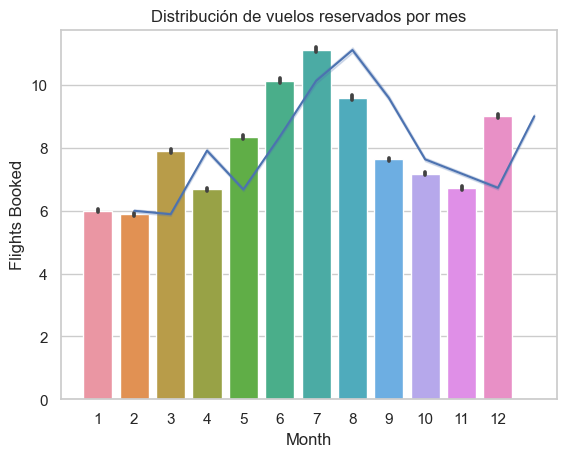

In [474]:
#Usamos la librería de Seaborn para hacer la represensentación gráfica de los vuelos reservados popr mes:
#? Usamos un barplot ya que al tener estas columnas pocos valores únicos, este tipo de gráficas es más visible. La línea negra en el tope de las barras  inidca la variación de los datos con respecto a la media.

# establecemos el número de filas, columnas que queremos así como el tamaño que vamos a querer que tenga la figura. 


sns.set_color_codes("pastel")
sns.barplot(x='Month',
            y='Flights Booked',
            data=df_customer)
plt.title("Distribución de vuelos reservados por mes")

'''Usamos una gráfica de series temporales con bandas de error. Las lineas representan el valor promedio de los vuelos reserrvados y las bandas de error muestrasn el intervalo de confianza para cada punto en la serie temporal.'''

sns.set_color_codes("pastel") #Escogemos este tema para la representación.
sns.lineplot(x='Month',
             y='Flights Booked',
            data=df_customer)

plt.title("Distribución de vuelos reservados por mes");


En esta gráfica podemos observar que el número de reservas de vuelos __aumenta significativamente en los periodos vacacionales como verano, navidad o semana santa__. 
Las lineas negras del tope de las barras son muy pequeñas lo que indica una baja dispersion de los datos en torno a la media (varianza).

4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los 
    clientes?
    Usaremos las columnas: 'Distance', 'Points Accumulated'

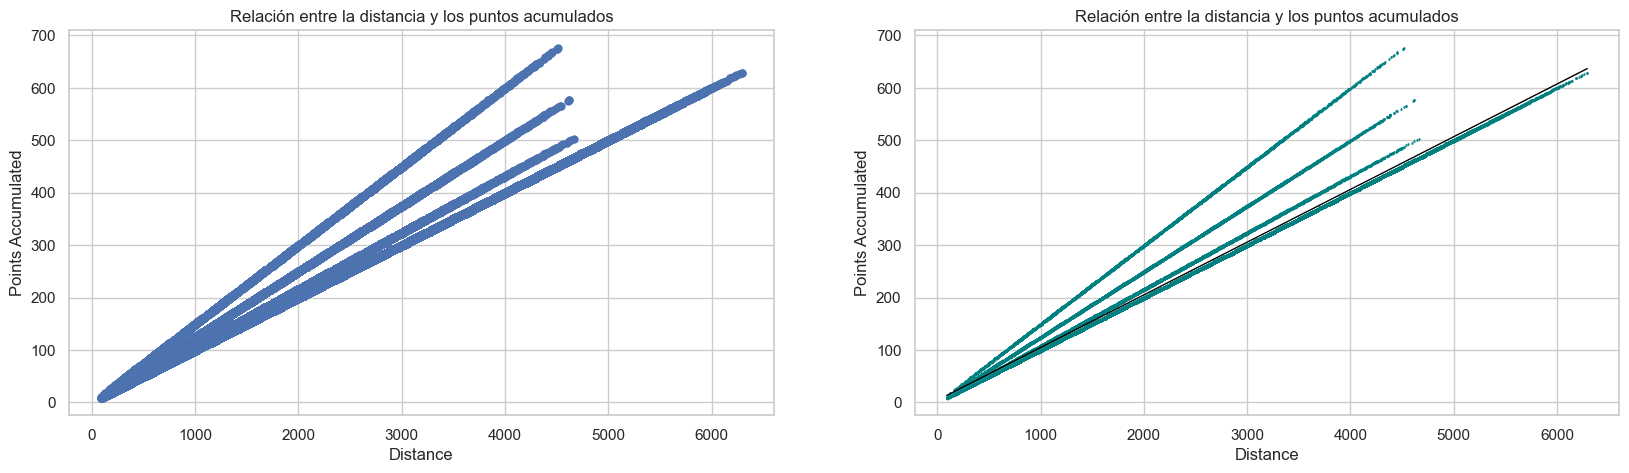

In [475]:
#Al tener tantos valores únicos y dado el numero de datos, usamos un gráfico de dispersión.
#*Tras obtener la primera gráfica vemos la necesidad de adjuntar otra que nos indique la linealidad de los datos.
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))# establecemos el número de filas, columnas que queremos así como el tamaño que vamos a querer que tenga la figura. 
sns.set_theme(style='whitegrid') #Escogemos el tema de la gráfica
sns.scatterplot(x='Distance', 
                y='Points Accumulated',
                data=df_customer,
                palette="ch:r=-.2,d=.3_r", 
                linewidth=0,
                ax = axes[0]) #Tras obtener esta gráfica vemos la necesidad de adjuntar otra que nos indique la linealidad de los datos.

# cambiamos el nombre de los ejes usando los métodos
axes[0].set_title('Relación entre la distancia y los puntos acumulados')
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Points Accumulated')


sns.regplot(x='Distance', 
            y='Points Accumulated',
            data=df_customer, 
            marker = 'd',
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1},# cambiamos el color y el tamaño de los puntos del scaterplot
            ax = axes[1])

axes[1].set_title('Relación entre la distancia y los puntos acumulados')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Points Accumulated');



In [476]:
#Sacamos las filas de l df que cumplan la siguiente condicion: 'Distance' >6000, 'Points Accumulated'>600

prueba=df_customer.loc[(df_customer['Distance'] >6000) & (df_customer['Points Accumulated'] > 600)]

prueba.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year
6609,149462,2017,7,20,9,29,6061,606.00,0,0,Canada,Quebec,Tremblant,H5Y 2S9,Female,Bachelor,67101.00,Married,Star,15739.92,Standard,2013,1,2017.67
166246,172200,2018,7,18,11,29,6090,609.00,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,90265.00,Married,Star,2551.23,2018 Promotion,2018,3,2017.76
140274,732808,2017,7,20,11,31,6293,629.00,0,0,Canada,Quebec,Montreal,H2T 2J6,Male,College,79616.44,Single,Nova,18708.76,Standard,2016,10,2017.72
180867,972636,2017,7,18,9,27,6048,604.00,0,0,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,91239.00,Married,Nova,5838.90,Standard,2017,1,2017.76
20906,263569,2018,7,19,11,30,6120,612.00,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,78830.00,Married,Star,8646.50,Standard,2015,7,2017.72
205460,868830,2017,7,21,10,31,6014,601.00,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Doctor,159402.00,Divorced,Nova,7296.54,Standard,2014,11,2017.00
52081,509513,2017,7,20,11,31,6231,623.00,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,79616.44,Single,Star,4121.25,Standard,2012,12,2017.72
36372,533509,2018,7,17,10,27,6183,618.00,798,64,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,91673.00,Married,Star,5773.52,Standard,2016,2,2017.77
133320,566961,2018,7,16,11,27,6021,602.00,0,0,Canada,Manitoba,Winnipeg,R3R 3T4,Female,Doctor,175678.00,Married,Aurora,8084.33,Standard,2015,7,2018.09
1833,184151,2017,7,16,10,26,6136,613.00,447,36,Canada,Quebec,Montreal,H2Y 4R4,Male,Bachelor,103862.00,Married,Star,3980.42,Standard,2017,5,2017.81


In [477]:
df_customer['Loyalty Card'].value_counts()

Loyalty Card
Star      94683
Nova      70102
Aurora    42847
Name: count, dtype: int64

Buscamos esta clasificación haciendo un diagrama de correlación:

In [478]:
#Buscamos esta clasificación haciendo un diagrama de correlación:
from itertools import combinations #importamos laa funcion combinations de la libreria itertools
# definimos las columnas  numéricas  entre las que se encuentra 'Distance' y 'Points Accumulated'
c_num = df_customer.select_dtypes(include = np.number).columns
combinaciones = list(combinations(c_num, 2))# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas


In [481]:
#convertimos las columnas numericas en un df:
df_c_num=df_customer.loc[:,c_num]


In [482]:
def identificar_linealidad (dataframe, lista_combinacion_columnas):

    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

In [483]:
lineal, no_lineal = identificar_linealidad(df_c_num, combinaciones )

In [484]:
lineal

[]

In [485]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df_c_num.corr( method = "spearman") #? Pearson, kendall. Spearman:o no tiene una forma específica para la distribución de los datos


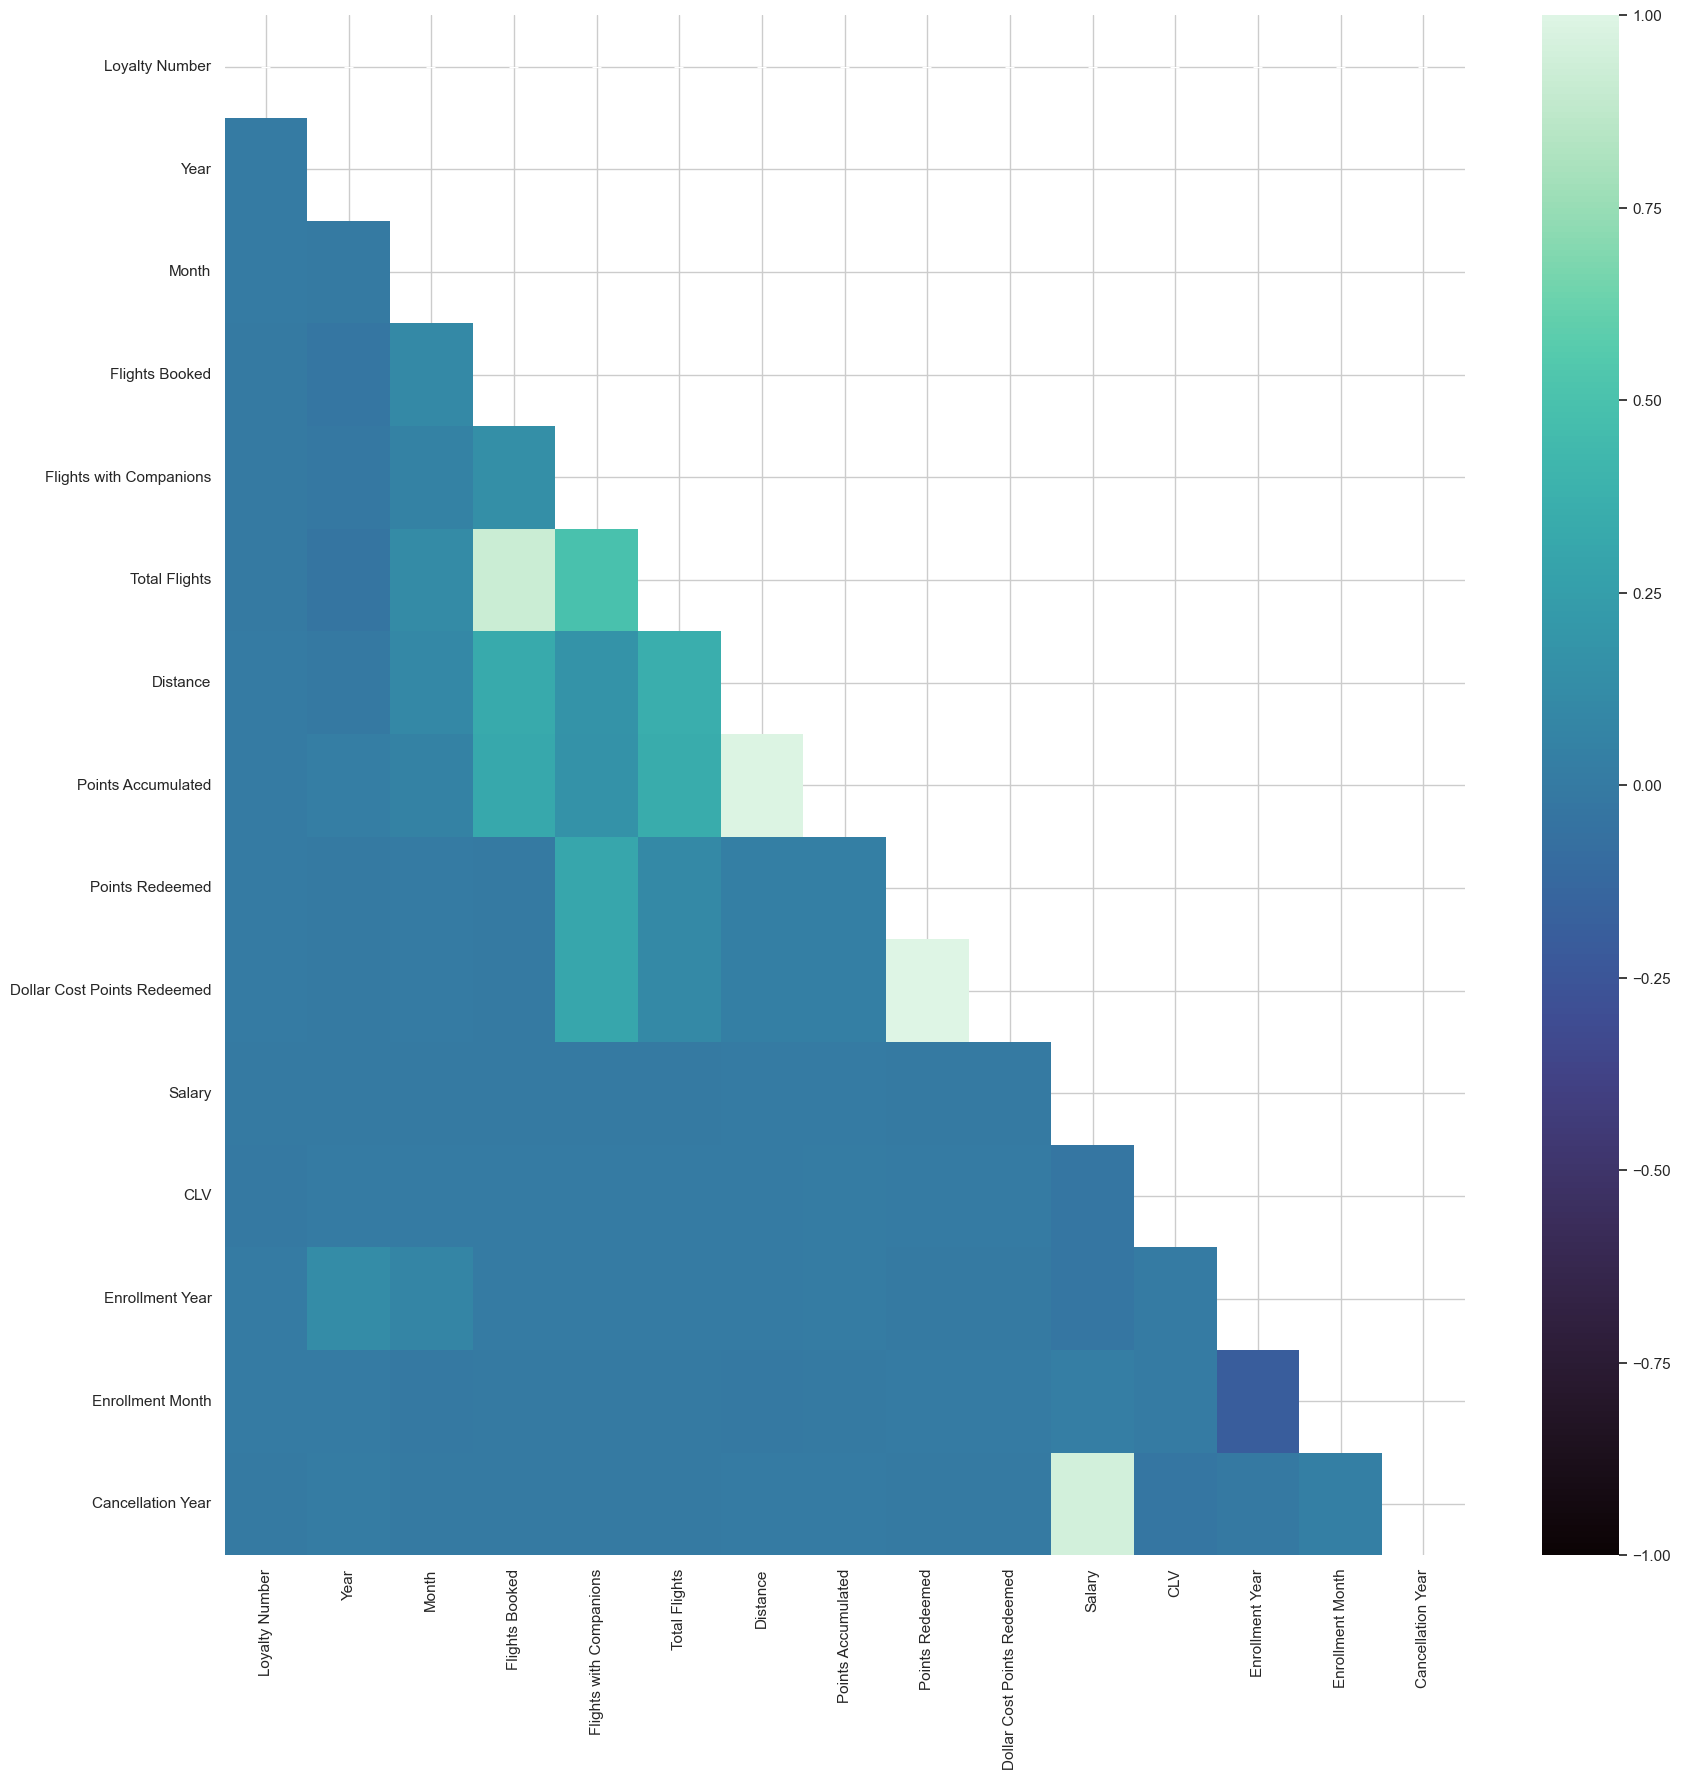

In [486]:
# convertimos nuestra matriz de correlación a una gráfica
plt.figure(figsize = (20, 20))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

In [487]:
#Vemos que tanto 'Distance' como ''Points Accumulated'' tienen una relacion con EnrollmentYear, Points Redeemed, Dollar Cost
df_customer['Enrollment Year'].value_counts()


Enrollment Year
2016    35738
2013    34628
2014    33855
2015    32772
2017    27985
2012    24294
2018    18360
Name: count, dtype: int64

No hay ninguna de las variables numericas que sigan una distribucion lineal con 'Distance' o 'Points Accumulated'

Observamos que los puntos acumulados sigue una tendencia lineal ascendente con respecto a la distancia. Es decir, los puntos aumentan al aumentar la distancia.
Tambien observamos una clasificación de los puntos. hay cuatro categorias que siguen una tendencia ascendente. Dependiendo de la categoría los puntos aumentan en mayor cantidad para una misma ditancia. 


5. ¿Cuál es la distribución de los clientes por provincia o estado?
Vamos a usar las siguientes columna: 'Province', 'City'

In [488]:
#Agrupamos los clientes en funcion de la provincia y la ciudad.
clientes_provincia=df_customer.groupby('Province')['Loyalty Number'].count().reset_index()
clientes_estado=df_customer.groupby('City')['Loyalty Number'].count().reset_index()

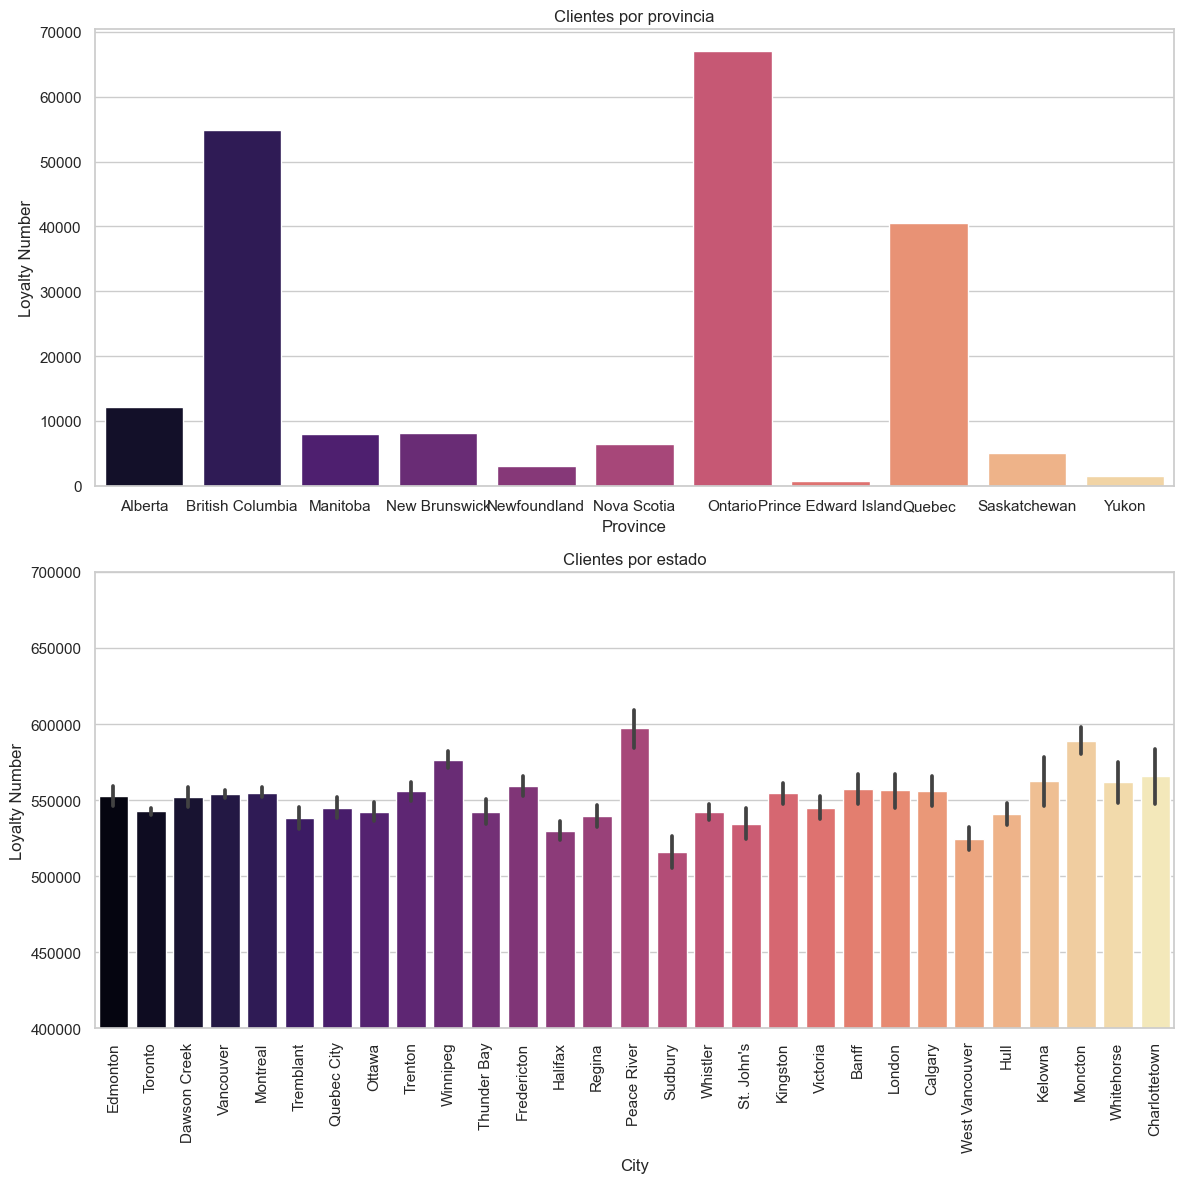

In [490]:
#agrupamos a los clientes por provincia y por estado:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,12)) #Creamos dos sublots.
sns.barplot(x = 'Province', 
            y = 'Loyalty Number', 
            data = clientes_provincia, 
            ax = axes[0], 
            palette = "magma")
axes[0].set_title('Clientes por provincia')
plt.xticks(rotation=45) #Para que se vean bien los nombres, los rotamos 45º 
plt.tight_layout() #! 
sns.barplot(x = 'City', 
            y = 'Loyalty Number', 
            data = df_customer, 
            ax = axes[1], 
            palette = "magma")
axes[1].set_title('Clientes por estado')
plt.ylim(400000, 700000) #ajustamos los valores, para observar mejor las barras. 
plt.xticks(rotation=90) #Para que se vean bien los nombres, los rotamos 45º 
plt.tight_layout();

Observamos que al filtrar los clientes por estado, se sigue una __distribución uniforme__, No nos aporta informacion relevante.
Sin embargo, si filtramos por provincia, podemos observar que hay una cantidad bastante significativa de clientes procedentes de: British Columbia, Otario Prince, Quebec.

 6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los 
clientes?
Usaremos las columnas 'Salary', 'Education'

In [491]:
#Agrupamos salarios en funcion de la Educacion de los clientes.
salario_medio_educacion=df_customer.groupby('Education')['Salary'].mean().reset_index().sort_values(by = 'Salary', ascending = False)
salario_medio_educacion

,Education,Salary
2,Doctor,177991.68
4,Master,103607.97
1,College,80748.06
0,Bachelor,72880.09
3,High School or Below,60804.66


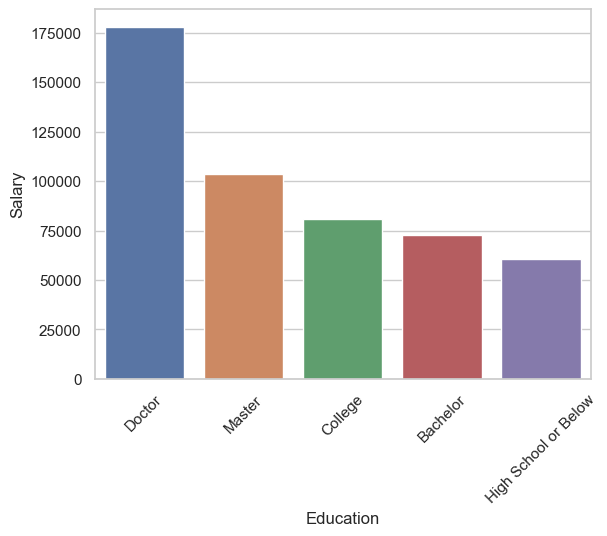

In [492]:
sns.barplot(x = 'Education', y = 'Salary', data = salario_medio_educacion)
plt.xlabel('Education')
plt.ylabel('Salary')
plt.xticks(rotation=45);

El salario aumenta segun el nivel de formación.

 7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
 Usaremos las columnas 'Loyalty Number', 'Loyalty Card'

In [493]:
proporcion_tarjetas_fidelizacion=df_customer.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
proporcion_tarjetas_fidelizacion

,Loyalty Card,Loyalty Number
0,Aurora,42847
1,Nova,70102
2,Star,94683


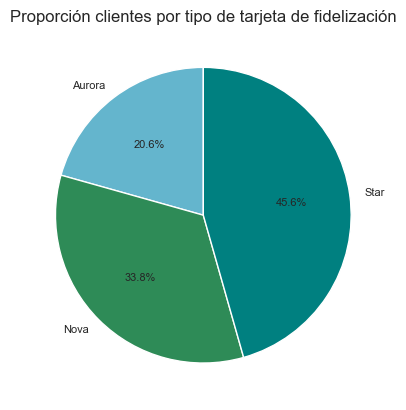

In [494]:
colores=["c", "seagreen", "teal", "turquoise"]
plt.pie('Loyalty Number', labels= 'Loyalty Card',
        data =proporcion_tarjetas_fidelizacion , 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90)
plt.title('Proporción clientes por tipo de tarjeta de fidelización');

La tarjeta de fidelización Aurora es la menos popular.

8. ¿Cómo se distribuyen los clientes según su estado civil y género?
Usaremos las columnas 'Gender', 'Marital Status','Loyalty Card'

(array([0, 1, 2]),
 [Text(0, 0, 'Married'), Text(1, 0, 'Single'), Text(2, 0, 'Divorced')])

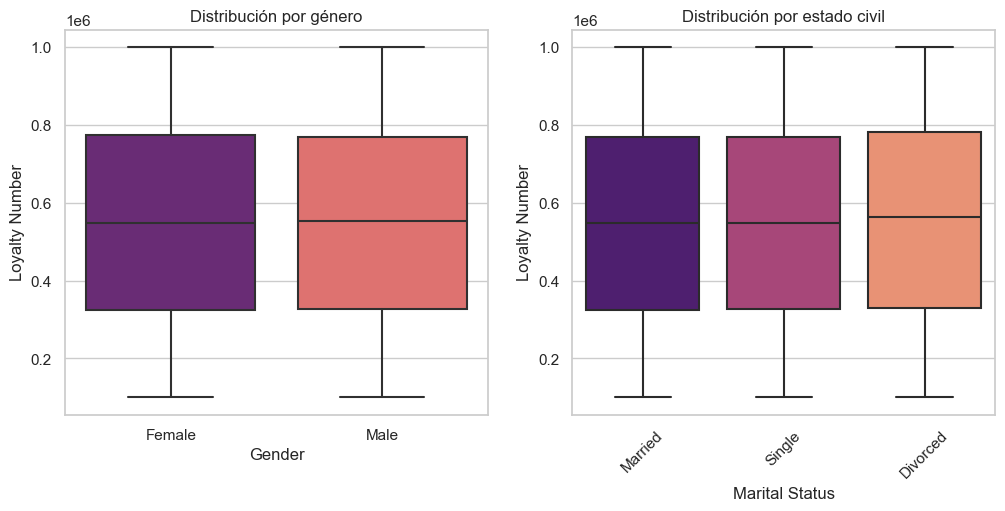

In [495]:
#Creamos un gráfico de correlacion para las columnas: ['Gender', 'Marital Status','Loyalty Number']

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
sns.boxplot(x = 'Gender', 
                y = 'Loyalty Number', 
                data = df_customer, 
                ax = axes[0], 
                palette = "magma")
axes[0].set_title('Distribución por género')
plt.xticks(rotation=45) #Para que se vean bien los nombres, los rotamos 45º 


sns.boxplot(x = 'Marital Status', 
                y = 'Loyalty Number', 
                data = df_customer, 
                ax = axes[1], 
                palette = "magma")
axes[1].set_title('Distribución por estado civil')
plt.xticks(rotation=45) #Para que se vean bien los nombres, los rotamos 45º 


In [497]:
df_customer['Marital Status'].value_counts()

Marital Status
Married     120890
Single       55781
Divorced     30961
Name: count, dtype: int64

De la distribución por genero, podemos observar que hay una proporcion casi igual de hombres y mujeres entre los clientes.
Del mismo modo vemos que hay una distribución casi igual entre los estados civiles de los clientes. 
Esto quiere decir que tanto para el tipo de género como para el estado civil, los grupos de población están equilibrados.

<h2 id="Evaluación">Evaluación</h2>

 ### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
 Objetivo del Ejercicio:
 Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias 
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para 
ello, los pasos que deberas seguir son:


9. Preparación de Datos:
 
 ￿ Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 
'Flights Booked' y 'Education'.
 

In [498]:
df_evaluacion=df_customer.loc[:,['Flights Booked','Education']]
df_evaluacion.sample(5)

,Flights Booked,Education
9275,5,Bachelor
155847,13,Bachelor
21678,6,College
56952,1,High School or Below
156664,7,Bachelor


10. Análisis Descriptivo:

￿ Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas 
(como el promedio, la desviación estandar, los percentiles) del número de vuelos 
reservados para cada grupo.

In [499]:
#Agrupamos los datos por nivel educativo:
df_ev_educacion=df_evaluacion.groupby('Education')['Flights Booked'].agg(["mean", "median", "std", "var", "min", "max"]).reset_index()
df_ev_educacion

,Education,mean,median,std,var,min,max
0,Bachelor,8.03,8.00,4.67,21.80,1,21
1,College,8.07,8.00,4.67,21.79,1,21
2,Doctor,8.05,8.00,4.70,22.07,1,21
3,High School or Below,8.02,8.00,4.68,21.91,1,21
4,Master,8.01,8.00,4.62,21.35,1,21


 11. Prueba Estadística:
 
 ￿ Realiza una prueba de A/B testing para determinar si existe una diferencia 
significativa en el número de vuelos reservados entre los diferentes niveles 
educativos.

In [500]:
# Importamos las librerias que vamos a usar para realizar los distintos test

from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway  # Para usar el análisis de varianza. ANOVA

Objetivo: Identificar la si hay diferencia de los numeros de vuelos reservados en función del nivel educativo de los clientes.

Planteamos dos hipótesis: 

H0: No existe diferencia significativa en el numero de vuelos.
H1: sí existe diferencia significativa en el numero de vuelos. Rechazamos la hipótesis nula.

En este caso, tenemos varios grupos control que dependen de la formación académica.

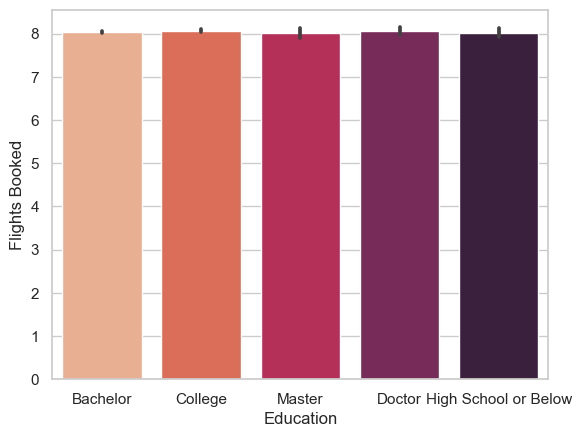

In [502]:
# analizamos los datos primero visualmente
sns.barplot(x='Education', y='Flights Booked', data=df_evaluacion,  palette = "rocket_r");

A primera vista no observamos una diferencia de los valores medios significativa.

Como comparamos medias de cinco grupos independientes, utilizaremos el método ANOVA para decidir qué hipótesis debemos aceptar.

In [504]:
#Para este análisis usamos la funcion f_oneway
anova_resultado = f_oneway(df_evaluacion['Flights Booked'][df_evaluacion['Education'] == 'Bachelor'],
                            df_evaluacion['Flights Booked'][df_evaluacion['Education'] == 'College'],
                            df_evaluacion['Flights Booked'][df_evaluacion['Education'] == 'Doctor'],
                            df_evaluacion['Flights Booked'][df_evaluacion['Education'] == 'High School or Below'],
                            df_evaluacion['Flights Booked'][df_evaluacion['Education'] == 'Master'])

# Imprimir resultados
print("Estadístico F:", anova_resultado.statistic)#?Representa la relación entre la variabilidad entre los grupos y la variabilidad dentro de los grupos. Un valor grande de F sugiere que al menos un par de medias son diferentes.
print("Valor p:", anova_resultado.pvalue) #?El valor p asociado al estadístico F indica la probabilidad de obtener un valor de estadístico F tan extremo como el observado.

# Interpretar los resultados
alpha = 0.05
if anova_resultado.pvalue < alpha:#
    print("Hay diferencias significativas  entre al menos dos grupos.")
    print("\n ---------- \n")
    print("""Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas.  
          """)

else:
    print("No hay evidencia de diferencias significativas en las reservas de vuelos entre los grupos.")
    print("\n ---------- \n")
    print(""" Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          """)

Estadístico F: 0.9277948166054187
Valor p: 0.44650426957724787
No hay evidencia de diferencias significativas en las reservas de vuelos entre los grupos.

 ---------- 

 Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          
